In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [23]:
from scipy.stats import binom
from scipy import stats as stats

In [5]:
n = 2
p = 0.5
k = 1

In [6]:
binom.pmf(k, n, p)

np.float64(0.5000000000000002)

In [7]:
ks = np.arange(n+1)

ps = binom.pmf(ks, n, p)
ps

array([0.25, 0.5 , 0.25])

In [8]:
from empiricaldist import Pmf

In [9]:
pmf_k = Pmf(ps, ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


In [10]:
def make_binomial(n, p):
    """Make a binomial Pmf."""
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

In [11]:
pmf_k = make_binomial(n=250, p=0.5)

/tmp/ipykernel_7567/1972584270.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right", title="n=250, p=0.5")


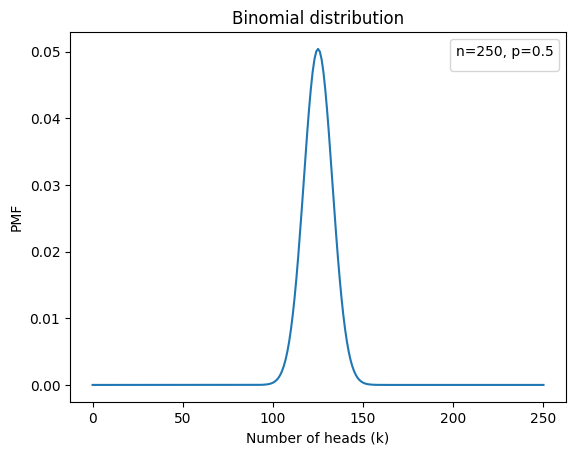

In [14]:
k = np.arange(251)

plt.plot(k, pmf_k)

plt.xlabel("Number of heads (k)")
plt.ylabel("PMF")
plt.title("Binomial distribution")
plt.legend(loc="upper right", title="n=250, p=0.5")
plt.show()

In [15]:
pmf_k.max_prob()

np.int64(125)

In [16]:
pmf_k[125]

np.float64(0.050412213147309655)

In [17]:
pmf_k[140]

np.float64(0.008357181724918188)

In [18]:
def prob_ge(pmf, threshold):
    """Probability of quantities greater than threshold."""
    ge = (pmf.qs >= threshold)
    total = pmf[ge].sum()
    return total

In [19]:
prob_ge(pmf_k, 140)

np.float64(0.03321057562002166)

In [20]:
pmf_k.prob_le(110)

np.float64(0.033210575620021665)

In [21]:
total_prob = pmf_k.prob_ge(140) + pmf_k.prob_le(110)
total_prob

np.float64(0.06642115124004333)

<Axes: title={'center': 'Binomial distribution'}, xlabel='Number of heads (k)', ylabel='PMF'>

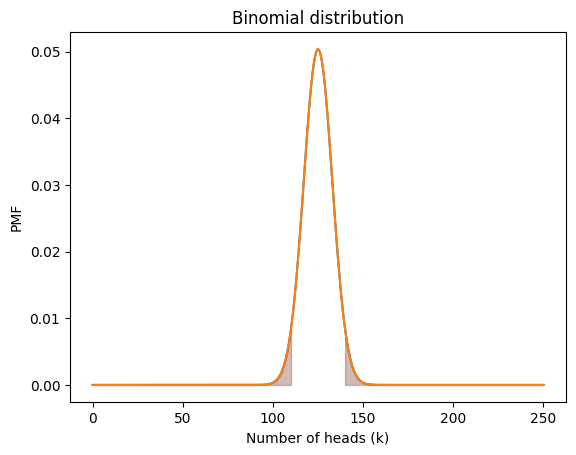

In [48]:
#k = np.arange(251)

def fill_below(pmf):
    qs = pmf.index
    ps = pmf.values
    plt.fill_between(qs, ps, 0, color='C5', alpha=0.4)

qs = pmf_k.index
fill_below(pmf_k[qs>=140])
fill_below(pmf_k[qs<=110])
pmf_k.plot(label='n=250, p=0.5')

pmf_k.plot(xlabel='Number of heads (k)',
         ylabel='PMF',
         title='Binomial distribution')


In [29]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)

likelihood_heads = hypos
likelihood_tails = 1 - hypos
likelihood = {"H": likelihood_heads, "T": likelihood_tails}

dataset = "H" * 140 + "T" * 110

In [30]:
def update_euro(pmf, dataset):
    """Update pmf with a given sequence of H and T."""
    for data in dataset:
        pmf *= likelihood[data]
        
    pmf.normalize()

In [31]:
posterior = prior.copy()

In [32]:
update_euro(posterior, dataset)

In [35]:
posterior.mean()

np.float64(0.5595238095238096)

/tmp/ipykernel_7567/3946432641.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right", title="140 heads out of 250")


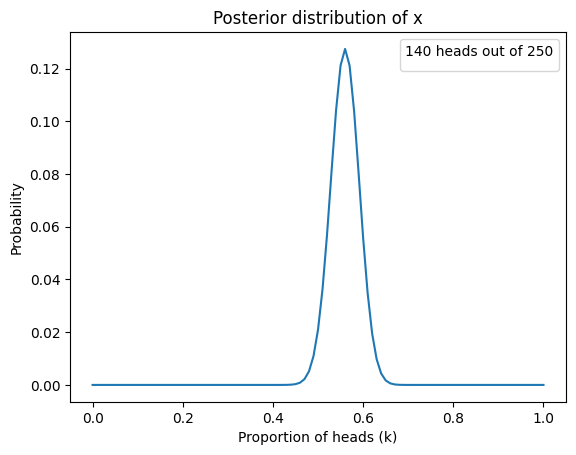

In [37]:
k = np.arange(101) / 100

plt.plot(k, posterior)

plt.xlabel("Proportion of heads (k)")
plt.ylabel("Probability")
plt.title("Posterior distribution of x")
plt.legend(loc="upper right", title="140 heads out of 250")
plt.show()

In [38]:
posterior.max_prob()

np.float64(0.56)

In [39]:
ramp_up = np.arange(50)
ramp_down = np.arange(50, -1, -1)

a = np.append(ramp_up, ramp_down)

triangle = Pmf(a, hypos, name="triangle")
triangle.normalize()

np.int64(2500)

In [40]:
uniform = Pmf(1, hypos, name="uniform")
uniform.normalize()

np.int64(101)

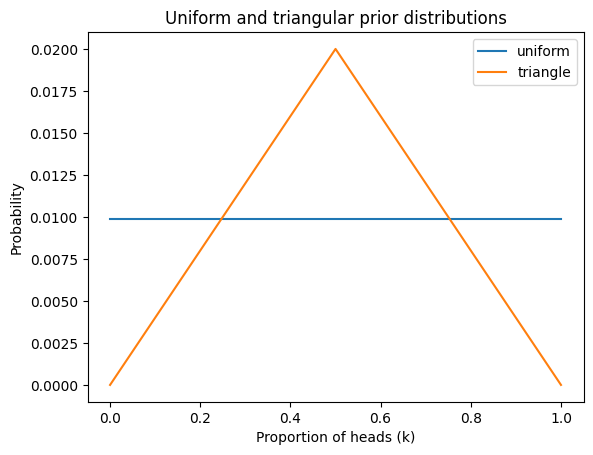

In [41]:
k = np.arange(101) / 100

plt.plot(k, uniform, label="uniform")
plt.plot(k, triangle, label="triangle")

plt.xlabel("Proportion of heads (k)")
plt.ylabel("Probability")
plt.title("Uniform and triangular prior distributions")
plt.legend(loc="upper right")
plt.show()

In [42]:
update_euro(uniform, dataset)
update_euro(triangle, dataset)

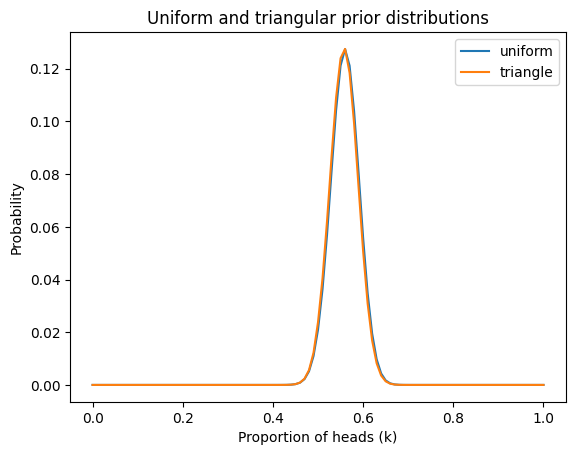

In [43]:
k = np.arange(101) / 100

plt.plot(k, uniform, label="uniform")
plt.plot(k, triangle, label="triangle")

plt.xlabel("Proportion of heads (k)")
plt.ylabel("Probability")
plt.title("Uniform and triangular prior distributions")
plt.legend(loc="upper right")
plt.show()

In [44]:
def update_binomial(pmf, data):
    """Update pmf using binomial distribution"""
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

In [45]:
uniform2 = Pmf(1, hypos, name="uniform2")
data = 140, 250
update_binomial(uniform2, data)

In [46]:
np.allclose(uniform, uniform2)

True

In [49]:
# Exercise 4-1

hypos = np.linspace(0.15, 0.4, 101)
prior = Pmf(1, hypos)

likelihood = {"H": hypos, "N": 1 - hypos}

dataset = "H" * 27 + "N" * 73

for data in dataset:
    prior *= likelihood[data]
    
prior.normalize()

np.float64(2.057123400981492e-24)

<Axes: xlabel='Probability of a hit', ylabel='PMF'>

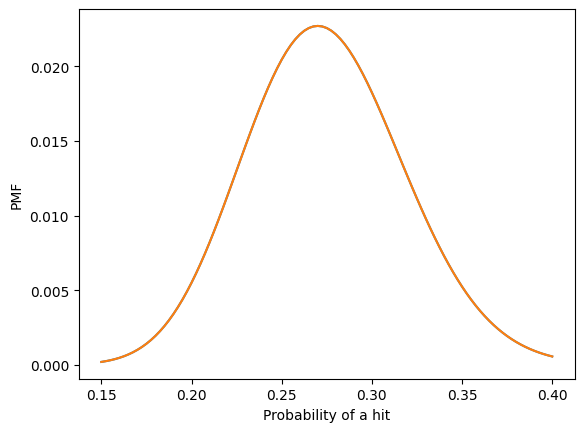

In [50]:
prior.plot(label="prior")

prior.plot(xlabel="Probability of a hit", ylabel="PMF")

In [51]:
posterior = prior.copy()

for data in "HHH":
    posterior *= likelihood[data]
    
posterior.normalize()

np.float64(0.022133436884141457)

<Axes: xlabel='Probability of a hit', ylabel='PMF'>

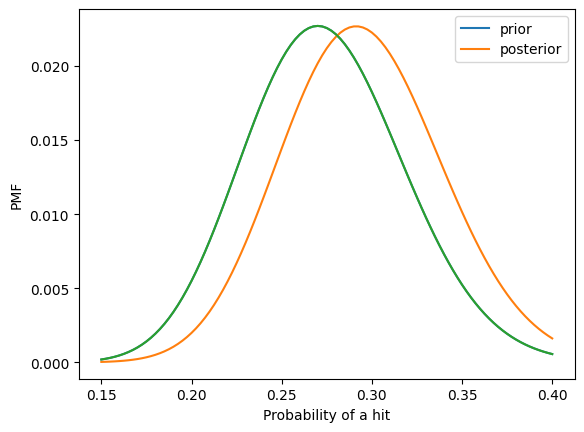

In [53]:
prior.plot(label="prior")
posterior.plot(label="posterior")
plt.legend()

prior.plot(xlabel="Probability of a hit", ylabel="PMF")

In [54]:
prior.max_prob()

np.float64(0.27)

In [55]:
posterior.max_prob()

np.float64(0.2925)

In [56]:
# Exercise 4-2

# Uniform prior
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)

likelihood = {"Y": 0.5 + hypos/2, "N": (1 - hypos)/2} # P(Y) + P(N) = 1.0

dataset = "Y" * 80 + "N" * 20

In [57]:
posterior = prior.copy()

In [58]:
for data in dataset:
    posterior *= likelihood[data]
    
posterior.normalize()

np.float64(3.6945139133967024e-21)

/tmp/ipykernel_7567/4163029870.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="80 YES, 20 NO")


<Axes: xlabel='Proportion of cheaters', ylabel='PMF'>

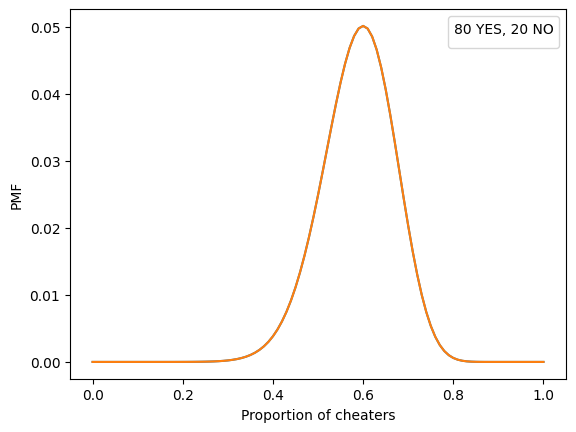

In [66]:
posterior.plot()
plt.legend(title="80 YES, 20 NO")

posterior.plot(xlabel='Proportion of cheaters',
         ylabel='PMF')

In [67]:
posterior.max_prob()

np.float64(0.6)

In [97]:
# Exercise 4-3

hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)

dataset = "H" * 140 + "T" * 110

In [98]:
def test_y_proportions(pmf, dataset, y):
    
    likelihood = {"H": hypos * (1-y) + (1 - hypos) * y,
                 "T": hypos * y + (1-y) * (1 - hypos)}
    
    for data in dataset:
        pmf *= likelihood[data]
        
    pmf.normalize()

In [99]:
posterior00 = prior.copy()
test_y_proportions(posterior00, dataset, 0.0)

posterior01 = prior.copy()
test_y_proportions(posterior01, dataset, 0.1)

posterior02 = prior.copy()
test_y_proportions(posterior02, dataset, 0.2)

posterior03 = prior.copy()
test_y_proportions(posterior03, dataset, 0.3)

posterior04 = prior.copy()
test_y_proportions(posterior04, dataset, 0.4)

In [101]:
posterior00.idxmax(), posterior01.idxmax(), posterior02.idxmax(), posterior03.idxmax(), posterior04.idxmax()

(np.float64(0.56),
 np.float64(0.5700000000000001),
 np.float64(0.6),
 np.float64(0.65),
 np.float64(0.8))

<Axes: xlabel='Proportion of heads (x)', ylabel='PMF'>

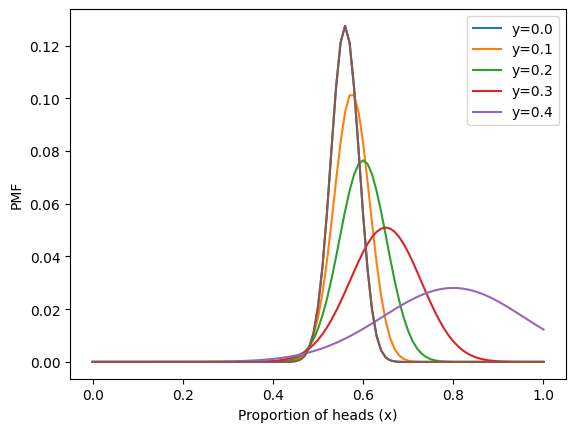

In [103]:
posterior00.plot(label="y=0.0")
posterior01.plot(label="y=0.1")
posterior02.plot(label="y=0.2")
posterior03.plot(label="y=0.3")
posterior04.plot(label="y=0.4")

plt.legend()
posterior00.plot(xlabel="Proportion of heads (x)", ylabel="PMF")

In [104]:
# Exercise 4-4

hypos = np.linspace(0.1, 0.4, 101) # uniform prior between 0.1 and 0.4
prior = Pmf(1, hypos)

# likelihoods for each of 3 possible outcomes: hitting 0 targets, hitting 1 in 2 tests, hitting 2 in 2 tests
n = 2
llh_array = [binom.pmf(k, n, hypos)**2 for k in range(n+1)]
likelihood = np.sum(llh_array, axis=0)

posterior = prior * likelihood
posterior.normalize()
posterior.idxmax()

np.float64(0.1)

<Axes: title={'center': 'Posterior distribution'}, xlabel='Probability of hitting the target', ylabel='PMF'>

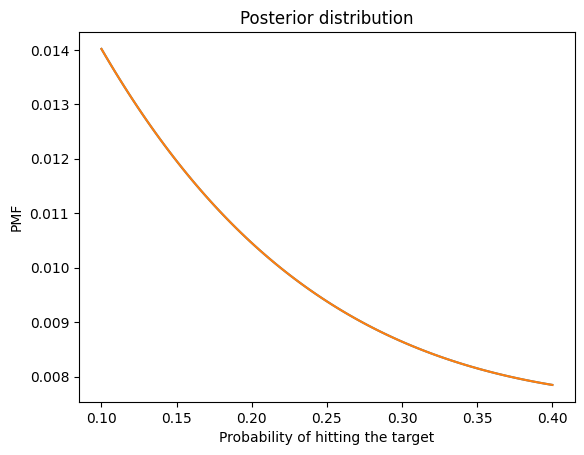

In [105]:
posterior.plot(title="Posterior distribution")

posterior.plot(xlabel='Probability of hitting the target',
         ylabel='PMF')